# Szigetek

https://medium.com/@yvanscher/playing-with-perlin-noise-generating-realistic-archipelagos-b59f004d8401

## Szigetek generálása Perlin zajjal

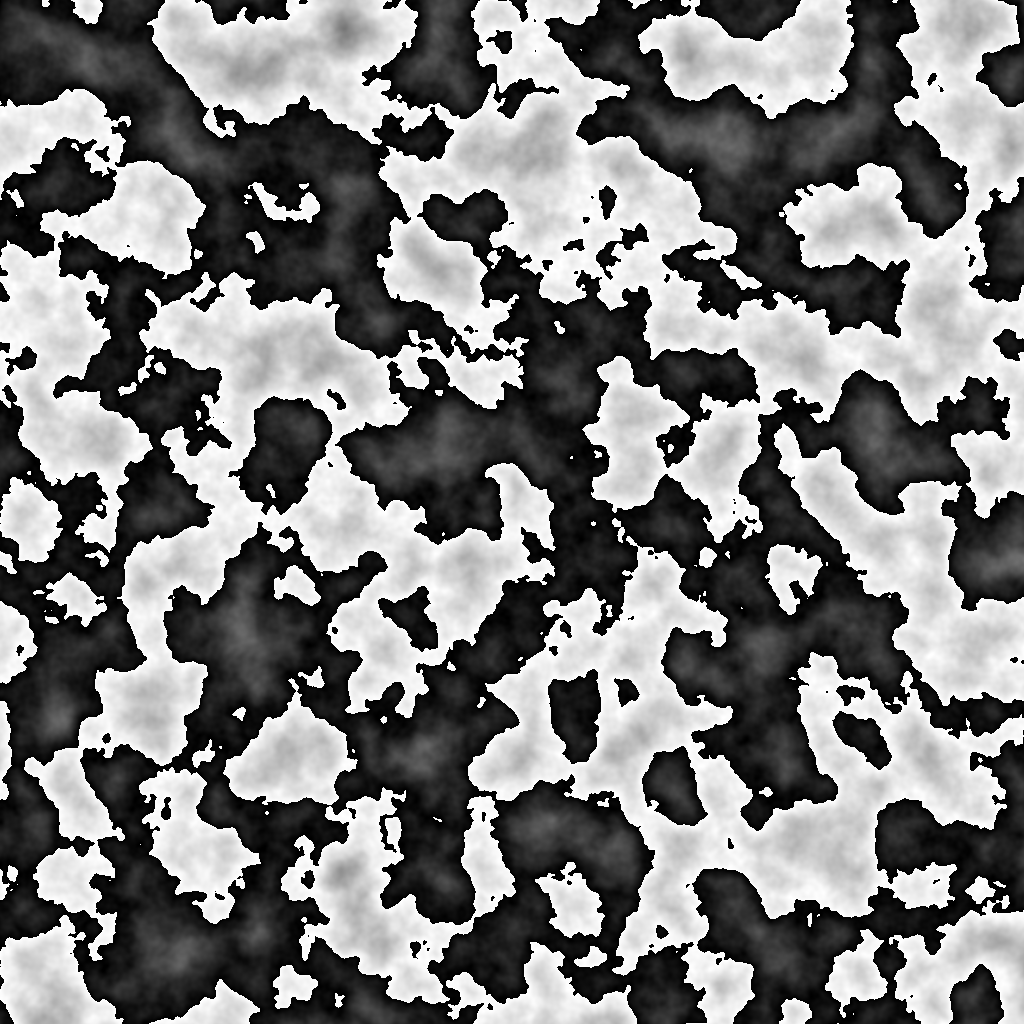

In [1]:
import noise
import random
import numpy as np
from PIL import Image

width = 1024
height = 1024
scale = 100
octaves = 5
persistence = 0.5
lacunarity = 2.0
base = random.randint(0,100)

world = np.zeros((width, height))
for i in range(width):
    for j in range(height):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=base)
        
imagePerlin = Image.fromarray((world*255).astype(np.uint8), mode="L")
display(imagePerlin)

## Az elkészült térkép színezése



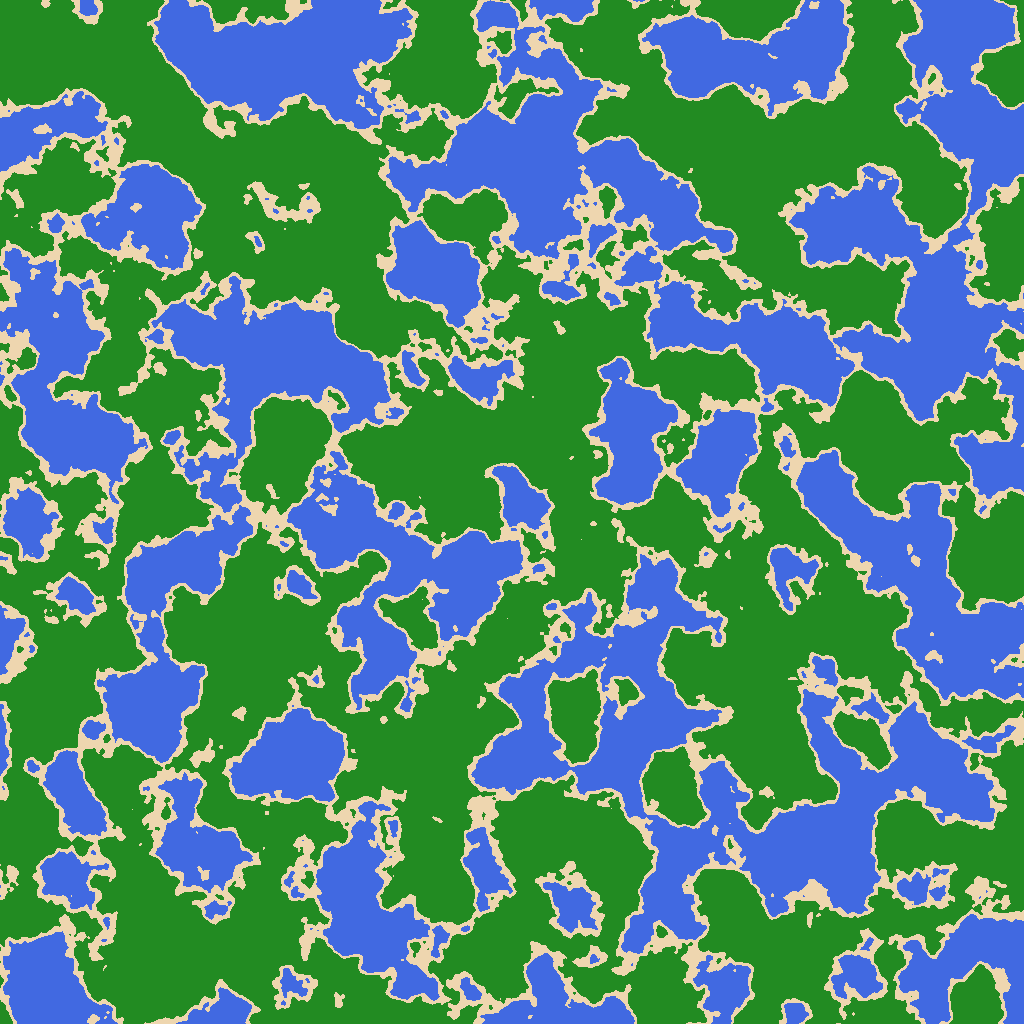

In [2]:
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]

def add_color(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(width):
        for j in range(height):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < 1.0:
                color_world[i][j] = green
            
    return color_world

color_world = add_color(world)
imagePerlin = Image.fromarray((color_world).astype(np.uint8))
display(imagePerlin)

## Kiegészítés hegyekkel és havas csúcsokkal

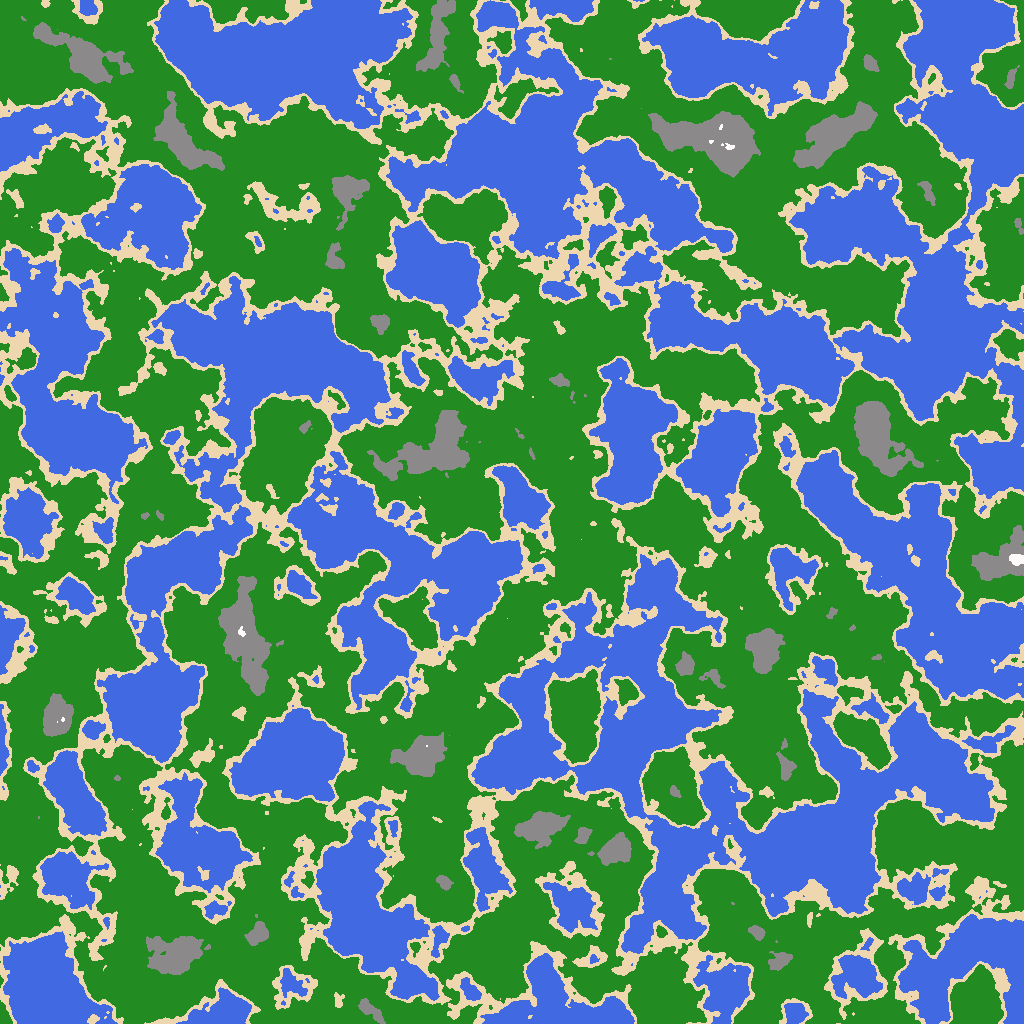

In [3]:
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

def add_color_2(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(width):
        for j in range(height):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < 0.25:
                color_world[i][j] = green
            elif world[i][j] < 0.4:
                color_world[i][j] = mountain
            elif world[i][j] < 0.5:
                color_world[i][j] = snow

    return color_world

color_world = add_color_2(world)
imagePerlin = Image.fromarray((color_world).astype(np.uint8))
display(imagePerlin)

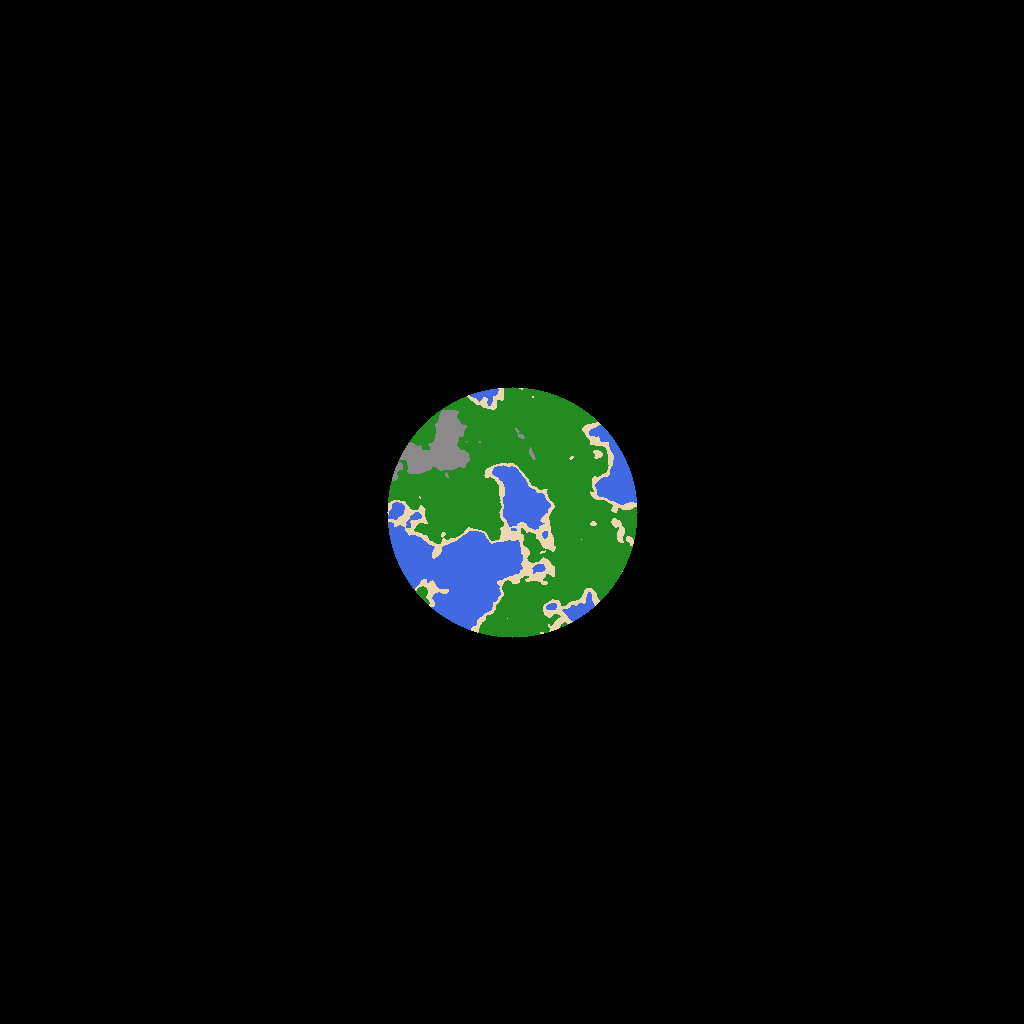

In [4]:
a,b = width/2, height/2
n = 1024
r = 125
y,x = np.ogrid[-a:n-a, -b:n-b]
# creates a mask with True False values
# at indices
mask = x**2+y**2 <= r**2

black = [0, 0, 0]
island = np.zeros_like(color_world)

for i in range(width):
    for j in range(height):
        if mask[i][j]:
            island[i][j] = color_world[i][j]            
        else:
            island[i][j] = black

#print(island)    
masked_island = Image.fromarray((island).astype(np.uint8))
display(masked_island)

## Gradiens hozzáadása

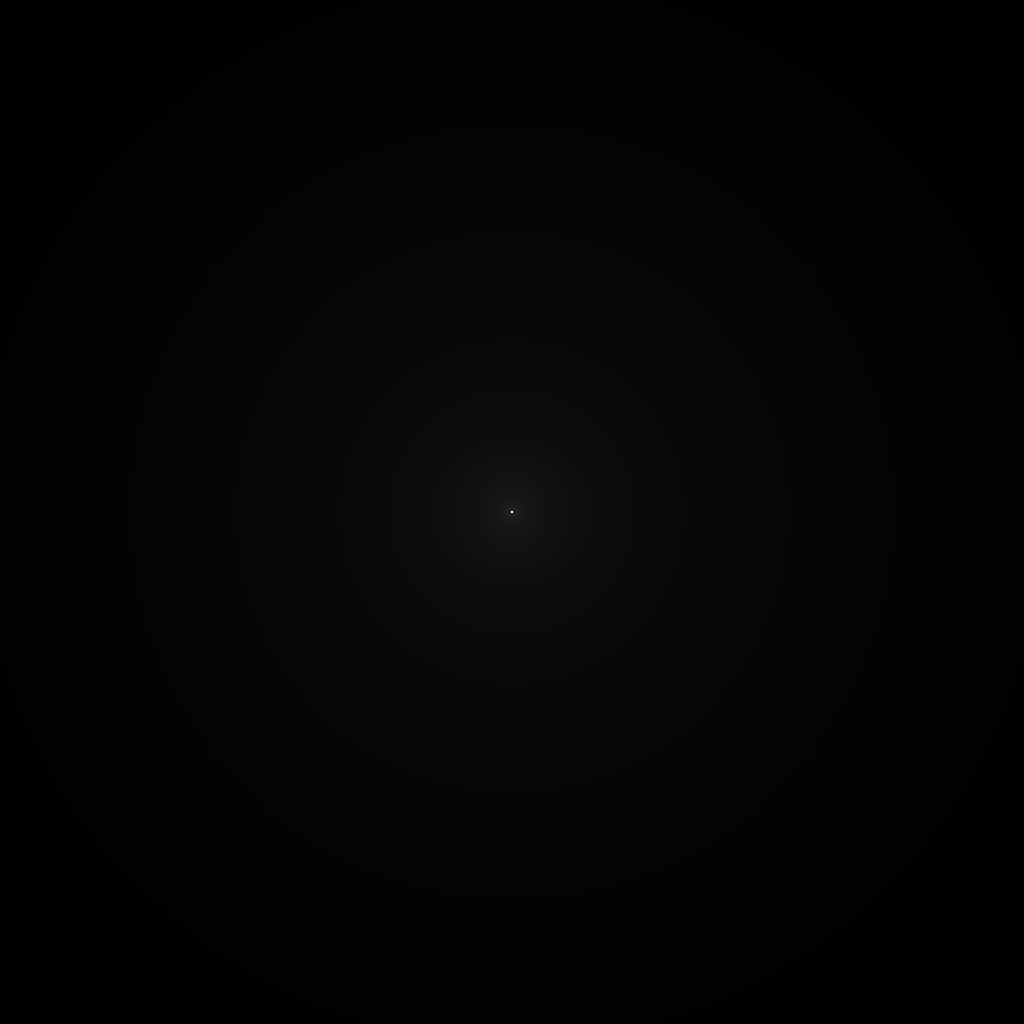

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Create a grid of coordinates
x, y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
gamma = 0.025
# Calculate the distance from the center
distance = np.sqrt(x**2 + y**2)

# Normalize the distance to [0, 1]
gradient = (distance - distance.min()) / (distance.max() - distance.min())
circle_gradient = 1 - np.power(gradient,gamma)
# Create a circular gradient

grad = Image.fromarray((circle_gradient*255).astype(np.uint8), mode = "L")
display(grad)

## Szigetek és gradiens

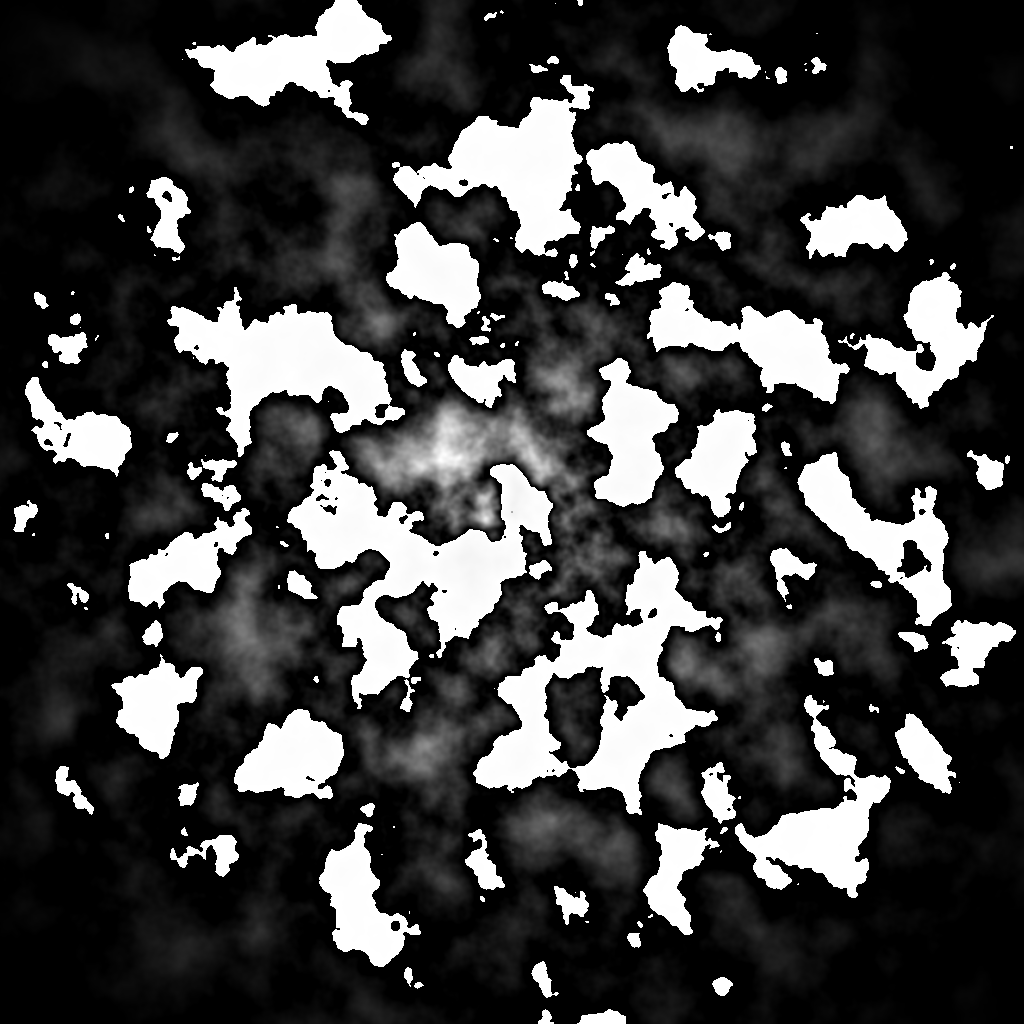

In [6]:
world_noise = np.zeros_like(world)

for i in range(width):
    for j in range(height):        
        world_noise[i][j] = (world[i][j] * circle_gradient[i][j])
        if world_noise[i][j] > 0:
            world_noise[i][j] *= 20

# get it between 0 and 1
max_grad = np.max(world_noise)
world_noise = world_noise / max_grad

filter = Image.fromarray((world_noise*255).astype(np.uint8), mode = "L")
display(filter)

## Színezett gradiens és szigetek

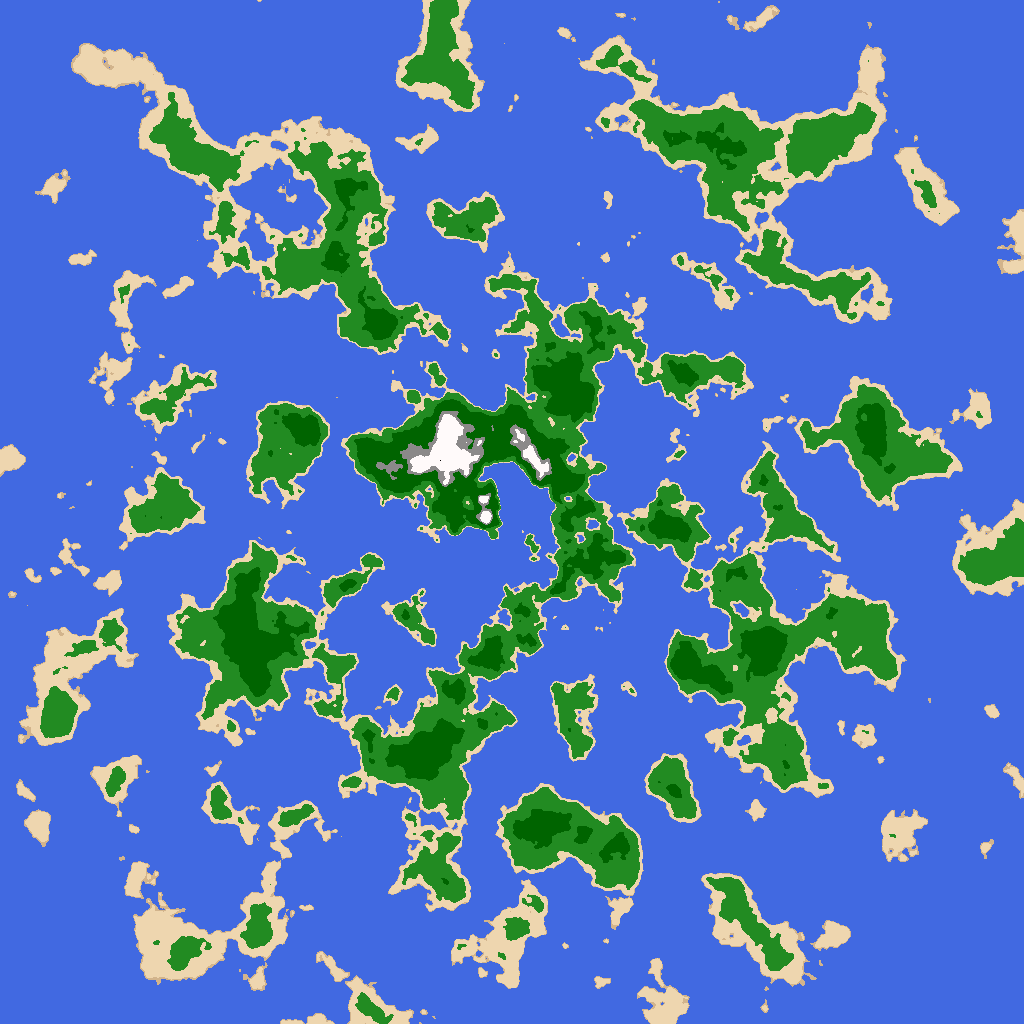

In [7]:
lightblue = [0,191,255]
blue = [65,105,225]
green = [34,139,34]
darkgreen = [0,100,0]
sandy = [210,180,140]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

threshold = 0

def add_color3(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(width):
        for j in range(height):
            if world[i][j] < threshold + 0.05:
                color_world[i][j] = blue
            elif world[i][j] < threshold + 0.055:
                color_world[i][j] = sandy
            elif world[i][j] < threshold + 0.1:
                color_world[i][j] = beach
            elif world[i][j] < threshold + 0.25:
                color_world[i][j] = green
            elif world[i][j] < threshold + 0.6:
                color_world[i][j] = darkgreen
            elif world[i][j] < threshold + 0.7:
                color_world[i][j] = mountain
            elif world[i][j] < threshold + 1.0:
                color_world[i][j] = snow

    return color_world

island_world_grad = add_color3(world_noise)

filter = Image.fromarray((island_world_grad).astype(np.uint8))
display(filter)